# Classifying digits using a convolutional neural network
The previous project attempted to classify digits using KNN algorithm and different neural network architectures. The neural networks did not improve the accuracy of the KNN, although they are faster to use once trained. In this project, we use convolutional neural networks, which are more adapted to image classification tasks.
## Reading the data

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
digits = load_digits()
data = pd.DataFrame(digits.data)
labels = pd.Series(digits.target)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


## Preparing the data 
The data needs to be converted into a single numpy array with appropriate dimensions and values between 0 and 1.

In [2]:
data_array = data.values.reshape(-1,8,8,1)
labels_array = labels.values.reshape(-1,1)

In [3]:
print(data_array.shape)
print(labels_array.shape)

(1797, 8, 8, 1)
(1797, 1)


In [4]:
data_array = data_array.astype('float32')
data_array = data_array /16
data_array.shape

(1797, 8, 8, 1)

In [7]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
from keras.utils import to_categorical
labels_array = to_categorical(labels_array)

Using plaidml.keras.backend backend.


## Building the convolution neural network
We will use the keras interface to create a CNN with multiple layers

In [26]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
batch_size = 64
epochs = 20
num_classes = 10

In [27]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(8,8,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
# model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
# model.add(LeakyReLU(alpha=0.1))
# model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
# model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
# model.add(LeakyReLU(alpha=0.1))                  
# model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax'))

In [28]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 8, 8, 32)          320       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 8, 8, 32)          0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                32832     
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total para

In [30]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(data_array, labels_array, test_size=0.2, random_state=1)

print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(1437, 8, 8, 1)
(360, 8, 8, 1)
(1437, 10)
(360, 10)


In [31]:
model_train = model.fit(train_X, train_y, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(test_X, test_y))

Train on 1437 samples, validate on 360 samples
Epoch 1/20
1437/1437 [==============================] - 7s 5ms/step - loss: 2.0848 - acc: 0.4530 - val_loss: 1.7636 - val_acc: 0.7306
Epoch 2/20
1437/1437 [==============================] - 0s 167us/step - loss: 1.4162 - acc: 0.8205 - val_loss: 1.0060 - val_acc: 0.8583
Epoch 3/20
1437/1437 [==============================] - 0s 165us/step - loss: 0.7746 - acc: 0.8608 - val_loss: 0.5600 - val_acc: 0.8806
Epoch 4/20
1437/1437 [==============================] - 0s 153us/step - loss: 0.4720 - acc: 0.9012 - val_loss: 0.3708 - val_acc: 0.9028
Epoch 5/20
1437/1437 [==============================] - 0s 154us/step - loss: 0.3325 - acc: 0.9214 - val_loss: 0.2943 - val_acc: 0.9167
Epoch 6/20
1437/1437 [==============================] - 0s 153us/step - loss: 0.2698 - acc: 0.9367 - val_loss: 0.2293 - val_acc: 0.9278
Epoch 7/20
1437/1437 [==============================] - 0s 153us/step - loss: 0.2146 - acc: 0.9478 - val_loss: 0.1877 - val_acc: 0.9528
Epo

In [32]:
test_eval = model.evaluate(test_X, test_y, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.06805164681540596
Test accuracy: 0.9777777777777777


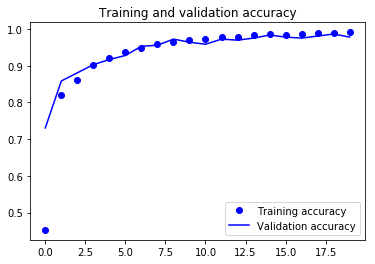

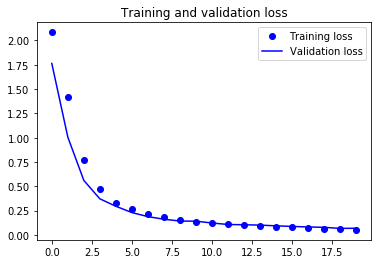

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = model_train.history['acc']
val_accuracy = model_train.history['val_acc']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [34]:
import numpy as np
predicted_classes = model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 5, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       5, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 5, 2,
       3, 2, 0, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 3, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 5, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 0, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 4, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 3, 9, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 4, 6, 4, 2, 8,
       5, 0, 2, 6, 0, 1, 8, 2, 0, 9, 5, 6, 7, 0, 5,

In [35]:
test_non_cat = np.argmax(test_y,axis=1)
test_non_cat

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4, 9, 2, 7, 8, 4, 6, 9, 3, 7, 4, 7, 1,
       8, 6, 0, 9, 6, 1, 3, 7, 5, 9, 8, 3, 2, 8, 8, 1, 1, 0, 7, 9, 0, 0,
       8, 7, 2, 7, 4, 3, 4, 3, 4, 0, 4, 7, 0, 5, 5, 5, 2, 1, 7, 0, 5, 1,
       8, 3, 3, 4, 0, 3, 7, 4, 3, 4, 2, 9, 7, 3, 2, 5, 3, 4, 1, 5, 5, 2,
       5, 2, 2, 2, 2, 7, 0, 8, 1, 7, 4, 2, 3, 8, 2, 3, 3, 0, 2, 9, 9, 2,
       3, 2, 8, 1, 1, 9, 1, 2, 0, 4, 8, 5, 4, 4, 7, 6, 7, 6, 6, 1, 7, 5,
       6, 3, 8, 3, 7, 1, 8, 5, 3, 4, 7, 8, 5, 0, 6, 0, 6, 3, 7, 6, 5, 6,
       2, 2, 2, 3, 0, 7, 6, 5, 6, 4, 1, 0, 6, 0, 6, 4, 0, 9, 3, 8, 1, 2,
       3, 1, 9, 0, 7, 6, 2, 9, 3, 5, 3, 4, 6, 3, 3, 7, 4, 9, 2, 7, 6, 1,
       6, 8, 4, 0, 3, 1, 0, 9, 9, 9, 0, 1, 8, 6, 8, 0, 9, 5, 9, 8, 2, 3,
       5, 3, 0, 8, 7, 4, 0, 3, 3, 3, 6, 3, 3, 2, 9, 1, 6, 9, 0, 4, 2, 2,
       7, 9, 1, 6, 7, 6, 3, 7, 1, 9, 3, 4, 0, 6, 4, 8, 5, 3, 6, 3, 1, 4,
       0, 4, 4, 8, 7, 9, 1, 5, 2, 7, 0, 9, 0, 4, 4, 0, 1, 0, 6, 4, 2, 8,
       5, 0, 2, 6, 0, 1, 8, 2, 0, 9, 5, 6, 2, 0, 5,

Found 351 correct labels


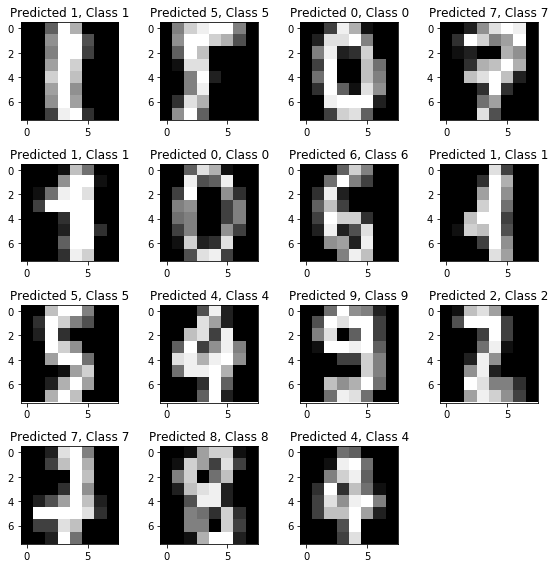

In [36]:
correct = np.where(predicted_classes==test_non_cat)[0]
print("Found %d correct labels" % len(correct))
plt.figure(figsize=(8,8))
for i, correct in enumerate(correct[:15]):
    plt.subplot(4,4,i+1)
    plt.imshow(test_X[correct].reshape(8,8), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_non_cat[correct]))
    plt.tight_layout()

Found 9 incorrect labels


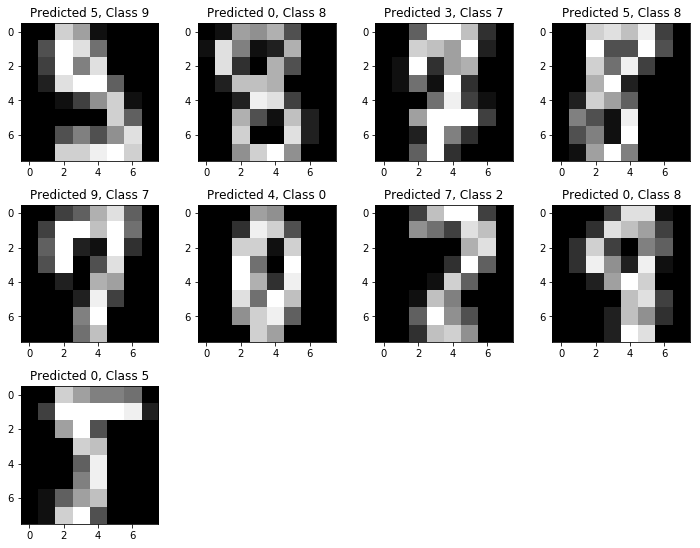

In [37]:
incorrect = np.where(predicted_classes!=test_non_cat)[0]
print("Found %d incorrect labels" % len(incorrect))
plt.figure(figsize=(10,10))
for i, incorrect in enumerate(incorrect[:15]):
    plt.subplot(4,4,i+1)
    plt.imshow(test_X[incorrect].reshape(8,8), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_non_cat[incorrect]))
    plt.tight_layout()